<a href="https://colab.research.google.com/github/Raahee1729/PyCBC-Tuts-and-Examples/blob/main/Q_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spectrogram-

1. for loop of H1 and L1 with event
2.  whitenned the data with choosing the segment length
3. time, frreq, power = zoom.qtransform(0.001,1,frange = ( , ), qrange=( , ))
4. pylab plot the spectrogram  

In [ ]:
# Install PyCBC and downgrade NumPy
!pip install -q numpy==1.23.5
!pip install -q pycbc

# Restart the runtime to finalize NumPy change
import os
os.kill(os.getpid(), 9)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 2.8.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.1

In [ ]:
# Get the data for H1 from the LOSC site
!wget https://losc.ligo.org/s/events/GW170104/H-H1_LOSC_4_V1-1167559920-32.gwf
!wget https://losc.ligo.org/s/events/GW170104/L-L1_LOSC_4_V1-1167559920-32.gwf

--2025-07-05 14:49:32--  https://losc.ligo.org/s/events/GW170104/H-H1_LOSC_4_V1-1167559920-32.gwf
Resolving losc.ligo.org (losc.ligo.org)... 131.215.113.72
Connecting to losc.ligo.org (losc.ligo.org)|131.215.113.72|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/events/GW170104/H-H1_LOSC_4_V1-1167559920-32.gwf [following]
--2025-07-05 14:49:33--  https://gwosc.org/s/events/GW170104/H-H1_LOSC_4_V1-1167559920-32.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.72
Connecting to gwosc.org (gwosc.org)|131.215.113.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1024018 (1000K)
Saving to: ‘H-H1_LOSC_4_V1-1167559920-32.gwf’

H-H1_LOSC_4_V1-1167 100%[===================>]   1000K  2.95MB/s    in 0.3s    

2025-07-05 14:49:35 (2.95 MB/s) - ‘H-H1_LOSC_4_V1-1167559920-32.gwf’ saved [1024018/1024018]

--2025-07-05 14:49:35--  https://losc.ligo.org/s/events/GW170104/L-L1_LOSC_4_V1-1167559920-32.gwf
Resolving losc.ligo.

<Figure size 640x480 with 0 Axes>

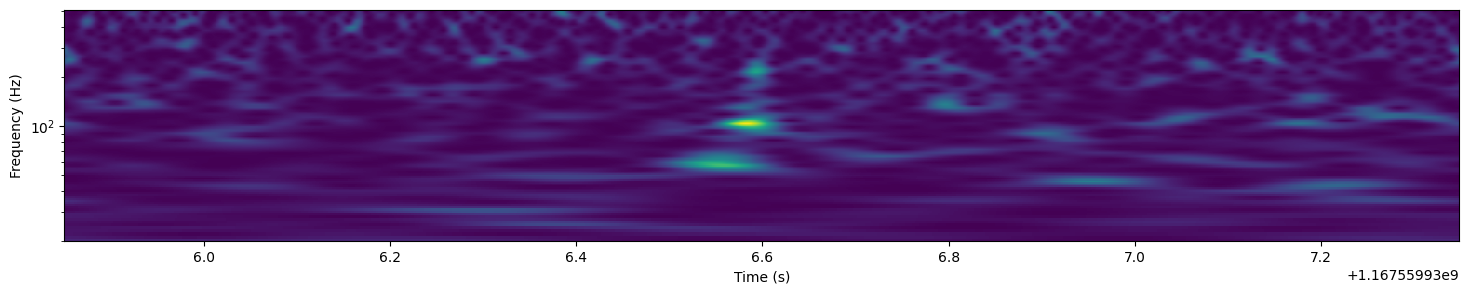

<Figure size 640x480 with 0 Axes>

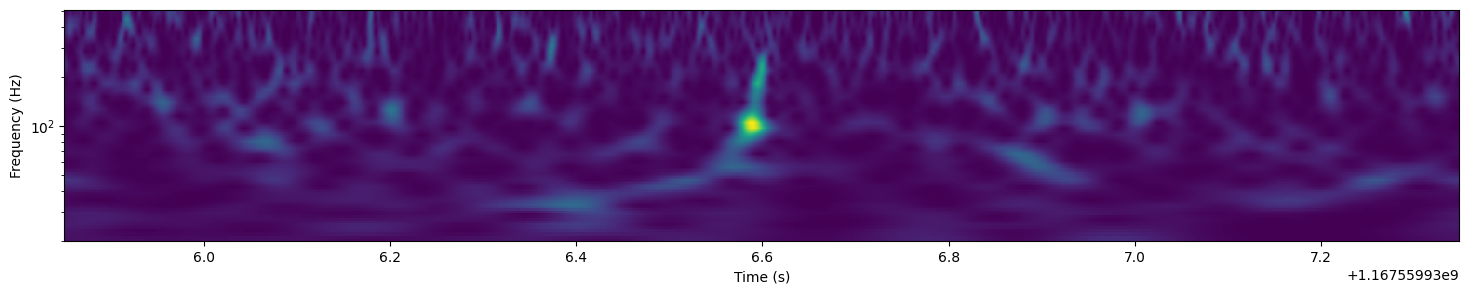

In [ ]:
%matplotlib inline

from pycbc.catalog import Merger
import pylab

for ifo in ['H1', 'L1']:
    pylab.figure()
    ts = Merger("GW170104").strain(ifo)

    ts = ts.whiten(4, 4)                                          # segment lenght of 4 sec
    zoom = ts.time_slice(1167559936.6 - .75, 1167559936.6 + .75)
    times, freqs, power = zoom.qtransform(.001, 1, frange=(20, 512), qrange=(4, 64))      # performs Q transform in bound of 20 to 512 Hz and Q range 4 to 64, with increment of 0.001 with length of 1 sec
                                                                                          # Q trasnform is decomposition of the signal is sin cos waves, and tell how the power
                                                                                          # is spread, tell me power and freq and time (3D)
                                                                                          # Q- TRANSFORM ------------------
                                                                                          # Apply a windowed sinusoid (wavelet) tuned to a certain frequency and Q
                                                                                          # Slide this wavelet across time
                                                                                          # Measure the overlap (projection) — the result is the power at that time-frequency-Q point

    pylab.figure(figsize=(18, 3))
    pylab.pcolormesh(times, freqs, power)

    pylab.ylim(20, 512)
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(times.min(), times.max())
    pylab.yscale('log')